# Which is Faster?
## Timing Numpy v.s. Loop for A Dot Product

In a Jupyter Notebook, some options to time a peice of code are:
* Jupyter's built in magic "time" function, which times a single execution of a cell or line.
* Jupyter's built in magic "timeit",  which times multiple executions of a cell or line and reports the average.
* The "timeit" package, which can time a multiple executions of a function.

## Setup

I'll use ```numpy``` to generate random vectors and will time its dot product function. I'll use ```timeit``` as an alternative to Jupyter's built in timers and will also use it to perfrom a more complete timing test. I'll use ```matplotlib``` to visualize the results.

In [1]:
# import packages

import numpy as np
from timeit import timeit
import matplotlib.pyplot as plt

I define a loop based dot product.


In [2]:
# define the dot product function using a loop

def dot(A,B):
    dp = 0
    
    for e, f in zip(A,B):
        dp += e * f
    
    return dp

I generate two vectors of size 1,000 as numpy arrays. I'll use these to time numpy's dot product. To be fair, I'll convert these to numpy arrays to lists when timing the loop-based method. (The loop based dot product will work on the numpy arrays, but I wrote the function with lists in mind.)

In [3]:
# create the vectors

# create the vectors as numpy arrays
A = np.random.randn(10**3)
B = np.random.randn(10**3)

# copy the vectors as lists
A_list = list(A)
B_list = list(B)

## Timing with Jupyter Magic

### Line Magic

Jupyter Magic's ```time``` function can be applied to a line by using ```%time``` on the line that is to be timed.

In [4]:
# time one execution of the loop-based function with numpy arrays as inputs

%time dot(A, B)

CPU times: user 253 µs, sys: 1 µs, total: 254 µs
Wall time: 258 µs


-18.273924159963734

In [5]:
# time one execution of the loop-based function with lists as inputs

%time dot(A_list, B_list)

CPU times: user 149 µs, sys: 1e+03 ns, total: 150 µs
Wall time: 152 µs


-18.273924159963734

In [6]:
# time one execution of numpy's function

%time np.dot(A,B)

CPU times: user 278 µs, sys: 31 µs, total: 309 µs
Wall time: 314 µs


-18.273924159963787

The loop-based function and numpy's dot product give the same result, but numpy's function appears to be many times faster. On my computer, the loop based function appear to take about 130 &#956;s. From executing the cells multiple times on my computer, I get an idea of how long each opertation takes. Numpy's function takes about 30&#956;s. As an added note, using the loop-based function with the numpy arrays takes longer than using the same function with lists as inputs. On my computer, this takes about 70 &#956;s longer.

### Cell Magic

I can also apply Jupyter's ```time``` function to a cell with ```%%time```. The "```%%```" tells Jupyter to apply the magic to the whole cell. With ```%%time``` and ```%%timeit```, the first line is taken as set up. The advantage to this is that I could time multiple lines of code without having to wrap them in a function. (Note: Cell magic must appear alone at the very begining of a cell.)

In [7]:
%%time

# timing a loop-based dot product without writing a function
# use arrays as inputs

dp = 0
for e, f in zip(A,B):
    dp += e * f    
dp

CPU times: user 318 µs, sys: 2 µs, total: 320 µs
Wall time: 324 µs


In [8]:
%%time

# timing a loop-based dot product without writing a function
# use lists as inputs

dp = 0
for e, f in zip(A_list,B_list):
    dp += e * f    
dp

CPU times: user 214 µs, sys: 0 ns, total: 214 µs
Wall time: 217 µs


In [9]:
%%time

# timing numpy's built in function

np.dot(A,B)

CPU times: user 33 µs, sys: 5 µs, total: 38 µs
Wall time: 38.1 µs


-18.273924159963787

Again, the loop-based function with numpy arrays as inputs take the longest and numpy's function takes the least time. Oddly, it seems that the times with cell magic are slightly longer than the times with line magic.

### Timing Multiple Executions

A problem with timing each function only once is that the results are likely to vary. Sometimes a command will take shorter to run and other times it will take longer. A solution to this is to use Jupyter's ```timeit``` magic. This can be used as both cell magic and line magic, but I will only implement it as line magic.

In [10]:
# find the average of 10 runs of the loop-based dot product function
# use arrays as inputs

%timeit -n 10 dot(A, B)

325 µs ± 148 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [11]:
# find the average of 10 runs of the loop-based dot product function
# use lists as inputs

%timeit -n 10 dot(A_list, B_list) 

169 µs ± 23.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [12]:
# find average of 10 runs of numpy's dot product

%timeit -n 10 np.dot(A,B)

The slowest run took 106.29 times longer than the fastest. This could mean that an intermediate result is being cached.
11 µs ± 25.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


We get the same order of results: the loop-based function on numpy arrays is the slowest, the looped-based function on lists in in the middle, while numpy's function is the fastest. Over multiple executions of the cells, on my computer, I see the average times are about 200 &#956;s, 140 &#956;s and  12 &#956;s respectivly.

The result for numpy's fuction seems suspiciously fast. When I time a single execution of it, I get a result around 30 &#956;s. However, when I run it multiple times and find the average, I get a much faster time. Most likely, the results are being cached. Luckily, Jupyter give us a warning like:
<br><br>```The slowest run took 115.01 times longer than the fastest. This could mean that an intermediate result is being cached.```

This issue can be solved using by using the ```timeit``` package.

## Timing with timeit Package

The ```timeit``` package creates an envirmonent to time a function. It turns off garbage collection and caching by default.

In order to use timeit, I need to create a function with no arguments to time. The timeit function from the timeit package expects a function with no arguments.

In [13]:
# define functions with no arguments

def dot_AB_array():
    return dot(A, B)

def dot_AB_list():
    return dot(A_list, B_list)

def np_dot_AB():
    return np.dot(A,B)

In [14]:
# find average of 10 runs of the loop-based function
# use numpy arrays as inputs

time = timeit(dot_AB_array, number=10)
print("%s ms" % (time * 1000 / 10))

0.22508100000000475 ms


In [15]:
# find average of 10 runs of the loop-based function
# use lists as inputs

time = timeit(dot_AB_list, number=10)
print("%s ms" % (time * 1000 / 10))

0.14240280000001881 ms


In [16]:
# find average of 10 runs of numpy's function

time = timeit(np_dot_AB, number=10)
print("%s ms" % (time * 1000 / 10))

0.003025999999994866 ms


Once again, the order of results is the same. However, this time, the result for the average time over multiple excution is closer to the result of running the one repeatedly. The caching problem from before, when I used Jupyter magic, does not apply.

On my computer, the average for the three functions are about 200 μs, 140 μs and 12 μs respectivly.

## A More Through Approach with timeit

I am interested in how the difference between the functions depends on the length of the vectors. A problem with my current approach to using ```timeit```, is that I need to define a function with no arguments to use the timer. This would require me to write a new function every time I wanted to change the arguments.

An alternative is to write a timer function that takes in the function to be timed and its arguments. It then defines an equivalent function with no arguments and times it.

In [17]:
# passes *args into a function and times it
# repeats reps times
# returns average time in milliseconds(ms)

def time_function(reps, func, *args):
    
    # define a function with no agruments to be used with timeit
    def no_args():
        return func(*args)
    
    avg_time = timeit(no_args, number=reps) / reps
    
    return avg_time * 1000

In [18]:
# find average of 10 runs of the loop-based function
# use numpy arrays as inputs

time_function(10, dot, A, B)

0.2314515000000128

In [19]:
# find average of 10 runs of the loop-based function
# use numpy arrays as inputs

time_function(10, dot, A_list, B_list)

0.15105989999999458

In [20]:
# find average of 10 runs of numpy's function

time_function(10, np.dot, A, B)

0.0074458000000277025

From this I get roughly the same results as using ```timeit``` directly.

Now, I want to see how the times change as the length of the vector grows. I build a function to time the different dot product functions at different lengths. Timing the function multiple times using the same vector might produce an inaccurate result, because the dot product may be faster to compute for some vectors. I will repeat over different vectors to ensure a fair test. 

In [21]:
# write a function to compute average time a function takes to execute a dot product of a given length

# returns times (in ms) a dot product function on std. normal generated data of a given length
# takes func, function that perfroms a calculation on two vectors (ex. dot product)
# takes vector_length, the length of the vector
# takes input_type of "array" or "list", indicates if the function should take arrays or lists as arguments
# takes data_reps, the number of times to generate the data
# takes reps, the number of time to run the timer for each data set
def time_dot_product(func, vector_length, input_type = "array", data_reps = 10, reps = 10):
    
    total_time = 0
    
    for i in range(0, data_reps):
        
        A = np.random.standard_normal(vector_length)
        B = np.random.standard_normal(vector_length)
        
        if input_type == "list":
            A = list(A)
            B = list(B)
            
        inst_time = time_function(reps, func, A, B)
        
        total_time += inst_time
    
    avg_time = total_time / data_reps
    
    return avg_time

I will time each of the functions for vectors of lengths 1 to 1,000,000. For a slower computer a lower order of magnitude should be chosen. With a faster computer, it might be interesting to see how the functions perform on much longer vectors.

In [22]:
# create an array of increasing times

ord_mag = 6
lengths = [10 ** n for n in range(0, ord_mag + 1)]

In [23]:
# time the loop-based function
# use list as inputs

loop_list_times = [time_dot_product(dot, e, "list") for e in lengths]
loop_list_times

[0.0009947199999960077,
 0.0022131299999994525,
 0.01577865000001122,
 0.14664203000000153,
 2.057840290000002,
 14.038471199999998,
 135.91591911]

In [24]:
# time the loop-based function
# use list as inputs

loop_array_times = [time_dot_product(dot, e, "array") for e in lengths]
loop_array_times

[0.0019127100000204678,
 0.0038661100000680904,
 0.027691879999984792,
 0.23453776000000204,
 2.1709208000000046,
 20.42129882000001,
 208.38902501000013]

In [25]:
# time numpy

np_times = [time_dot_product(np.dot, e) for e in lengths]
np_times

[0.008285389999969084,
 0.0025211199999120026,
 0.0015222899999400852,
 0.000781240000122807,
 0.02564858000006609,
 0.18263498999992578,
 0.5365956099999636]

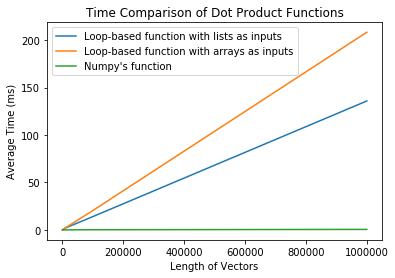

In [26]:
# plot numpy time v.s. loop time

plt.plot(lengths, loop_list_times, label = "Loop-based function with lists as inputs")
plt.plot(lengths, loop_array_times, label = "Loop-based function with arrays as inputs")
plt.plot(lengths, np_times, label = "Numpy's function")
plt.title("Time Comparison of Dot Product Functions")
plt.xlabel("Length of Vectors")
plt.ylabel("Average Time (ms)")
plt.legend()
plt.show()

Finally, I graph the times for numpy's dot product alone to emphasize that they too are linear in the vector's length.

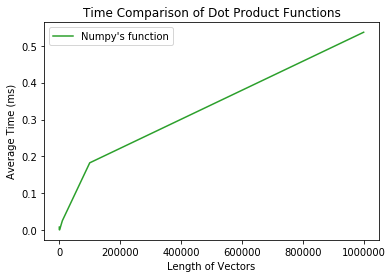

In [27]:
plt.plot(lengths, np_times, label = "Numpy's function", c = "C2")
plt.title("Time Comparison of Dot Product Functions")
plt.xlabel("Length of Vectors")
plt.ylabel("Average Time (ms)")
plt.legend()
plt.show()

## Conclusion

In conculsion, one should use numpy to compute a dot product and probably for other vector operations. However, it takes signifcantly more time to iterate over a numpy array than a list. If one needs to write a loop, lists are faster.